In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import sys

In [5]:
sys.path.append('..')

In [6]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve, 
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)

In [7]:
from this_project.censusdata import fetch_censusdata, make_linear_preprocessor

In [8]:
from sklearn import set_config
set_config(display='diagram')

In [9]:
X, y = fetch_censusdata()

In [10]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,NaN,NaN,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN,NaN,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,NaN,NaN,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,NaN,NaN,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,NaN,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,NaN,NaN,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,NaN,NaN,20,United-States


In [11]:
preprocessor = make_linear_preprocessor()

In [12]:
preprocessor.fit(X)

FeatureUnion(transformer_list=[('pipeline-1',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['workclass',
                                                                         'education',
                                                                         'marital_status',
                                                                         'occupation',
                                                                         'relationship',
                                                                         'race',
                                                                         'sex',
                                                                         'native_country'])),
                                                ('simpleimputer',
                                                 SimpleImputer(fill_value='MISSING',
                                                               strategy='constant')),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore'))])),
                               ('pipeline-...
                                                 SimpleImputer(strategy='median')),
                                                ('standardscaler',
                                                 StandardScaler())])),
                               ('pipeline-3',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['occupation',
                                                                         'sex',
                                                                         'race',
                                                                         'marital_status'])),
                                                ('simpleimputer',
                                                 SimpleImputer(fill_value='MISSING',
                                                               strategy='constant')),
                                                ('crossfeaturecalculator',
                                                 CrossFeatureCalculator()),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

In [13]:
clf = make_pipeline(
    preprocessor,
    LogisticRegression(C=12., max_iter=1000, class_weight='balanced', random_state=0)
)

In [14]:
clf

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['workclass',
                                                                                          'education',
                                                                                          'marital_status',
                                                                                          'occupation',
                                                                                          'relationship',
                                                                                          'race',
                                                                                          'sex',
                                                                                          'native_country'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant')),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_u...
                                                                  ColumnSelector(columns=['occupation',
                                                                                          'sex',
                                                                                          'race',
                                                                                          'marital_status'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant')),
                                                                 ('crossfeaturecalculator',
                                                                  CrossFeatureCalculator()),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('logisticregression',
                 LogisticRegression(C=12.0, class_weight='balanced',
                                    max_iter=1000, random_state=0))])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.787


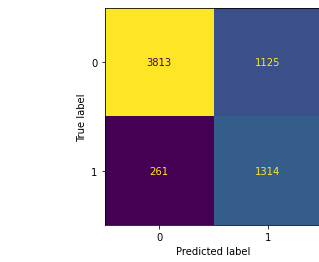

In [16]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

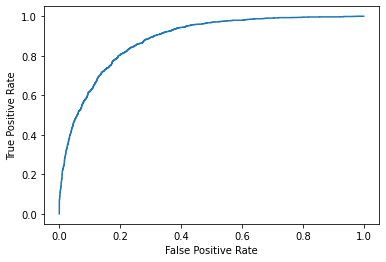

In [17]:
y_score = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

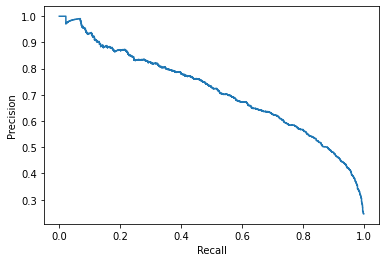

In [18]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()